In [1]:
import os
os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION'] = '.1'

from algorithms.utils import restore_state_multi_agent
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
directory = '/media/samuele/Disco/PycharmProjectsUbuntu/MARL-CER/trained_agents_to_keep/server_17-18/pomer/20250518_141527_bat_net_type_actor_critic_rec_net_type_mlp_lr_bat_5e-05_lr_REC_None_tot_timesteps_28032000_lr_sched_None_multiagent'

networks_batteries, network_rec, config, world_metadata, train_info, val_info = restore_state_multi_agent(directory)

{'ACTIVATION': 'tanh', 'BATTERY_ACTION_SPACE_SIZE': 1, 'BATTERY_OBS_IS_NORMALIZABLE': {'buying_price': True, 'cos_day_of_year': False, 'cos_seconds_of_day': False, 'demand': True, 'generation': True, 'network_REC_minus': True, 'network_REC_plus': True, 'selling_price': True, 'sin_day_of_year': False, 'sin_seconds_of_day': False, 'soc': False, 'temperature': True}, 'BATTERY_OBS_IS_SEQUENCE': {'buying_price': True, 'cos_day_of_year': False, 'cos_seconds_of_day': False, 'demand': True, 'generation': True, 'network_REC_minus': True, 'network_REC_plus': True, 'selling_price': True, 'sin_day_of_year': False, 'sin_seconds_of_day': False, 'soc': True, 'temperature': True}, 'BATTERY_OBS_KEYS': ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus'), 'BATTERY_VALUES_IN_REC_OBS_CRI': False, 'BETA_ADAM_BATTERIES': 0.9, 'BETA_ADAM_REC': 0.6, 'CLIP_EPS': 

E0518 21:39:17.347299    8988 hlo_lexer.cc:443] Failed to parse int literal: 62030283268846965543860


In [3]:
config

{'ACTIVATION': 'tanh',
 'BATTERY_ACTION_SPACE_SIZE': 1,
 'BATTERY_OBS_IS_NORMALIZABLE': {'buying_price': True,
  'cos_day_of_year': False,
  'cos_seconds_of_day': False,
  'demand': True,
  'generation': True,
  'network_REC_minus': True,
  'network_REC_plus': True,
  'selling_price': True,
  'sin_day_of_year': False,
  'sin_seconds_of_day': False,
  'soc': False,
  'temperature': True},
 'BATTERY_OBS_IS_SEQUENCE': {'buying_price': True,
  'cos_day_of_year': False,
  'cos_seconds_of_day': False,
  'demand': True,
  'generation': True,
  'network_REC_minus': True,
  'network_REC_plus': True,
  'selling_price': True,
  'sin_day_of_year': False,
  'sin_seconds_of_day': False,
  'soc': True,
  'temperature': True},
 'BATTERY_OBS_KEYS': ('temperature',
  'soc',
  'demand',
  'generation',
  'buying_price',
  'selling_price',
  'sin_day_of_year',
  'cos_day_of_year',
  'sin_seconds_of_day',
  'cos_seconds_of_day',
  'network_REC_plus',
  'network_REC_minus'),
 'BATTERY_VALUES_IN_REC_OBS_CRI'

In [4]:
world_metadata

WorldMetadata(world_train={'num_battery_houses': 4, 'battery_observations': ['demand', 'generation', 'temperature', 'soc', 'day_of_year', 'seconds_of_day', 'selling_price', 'buying_price', 'network_REC_plus', 'network_REC_minus'], 'rec_observations': ['demands_base_battery_houses', 'demands_battery_battery_houses', 'generations_base_battery_houses', 'mean_demands_base', 'mean_demands_batteries', 'mean_generations', 'day_of_year', 'seconds_of_day', 'network_REC_plus', 'network_REC_minus', 'exponential_average_rec_actions_prev_step'], 'demand': {'path': 'ernestogym/ernesto_jax/data/demand/rse_profiles_train.csv', 'timestep': 3600, 'test_profiles': None, 'data_usage': 'end'}, 'generation': {'path': {'battery_houses_generation': ['ernestogym/ernesto_jax/data/generation/Timeseries_45.235_10.693_SA3_3kWp_crystSi_14_30deg_-60deg_2015_2018._train.csv', 'ernestogym/ernesto_jax/data/generation/Timeseries_45.235_10.693_SA3_3kWp_crystSi_14_30deg_0deg_2015_2018._train.csv', 'ernestogym/ernesto_jax/

In [5]:
jax.tree.map(lambda x: jnp.isnan(x).any(axis=jnp.arange(1, x.ndim)), train_info)

{}

In [6]:
jax.tree.map(lambda x: x.shape, val_info)

{'actions_batteries': (11, 43350, 4),
 'actions_rec': (11, 43350, 4),
 'balance_minus': (11, 43350),
 'balance_plus': (11, 43350),
 'buy_prices': (11, 43350, 4),
 'demands': (11, 43350, 4),
 'dones': {'REC_agent': (11, 43350),
  '__all__': (11, 43350),
  'battery_agent_0': (11, 43350),
  'battery_agent_1': (11, 43350),
  'battery_agent_2': (11, 43350),
  'battery_agent_3': (11, 43350)},
 'energy_to_batteries': (11, 43350, 4),
 'generations': (11, 43350, 4),
 'norm_reward': {'r_clipping': (11, 43350, 4),
  'r_deg': (11, 43350, 4),
  'r_glob': (11, 43350, 4),
  'r_op': (11, 43350, 4),
  'r_trad': (11, 43350, 4)},
 'pure_reward': {'r_clipping': (11, 43350, 4),
  'r_deg': (11, 43350, 4),
  'r_glob': (11, 43350, 4),
  'r_op': (11, 43350, 4),
  'r_trad': (11, 43350, 4)},
 'r_tot': (11, 43350, 4),
 'rec_reward': (11, 43350),
 'self_consumption': (11, 43350),
 'sell_prices': (11, 43350, 4),
 'soc': (11, 43350, 4),
 'soh': (11, 43350, 4),
 'tot_incentives': (11, 43350),
 'weig_reward': {'r_clip

In [7]:
val_info['actions_rec']

array([[[2.47935951e-01, 2.52538204e-01, 2.49574825e-01, 2.49950975e-01],
        [2.48523355e-01, 2.51543373e-01, 2.49505222e-01, 2.50427991e-01],
        [2.50427604e-01, 2.50644624e-01, 2.48531461e-01, 2.50396252e-01],
        ...,
        [2.49432996e-01, 2.50536382e-01, 2.49248102e-01, 2.50782520e-01],
        [2.49997109e-01, 2.50218838e-01, 2.48906150e-01, 2.50877947e-01],
        [2.49228492e-01, 2.50895202e-01, 2.49102041e-01, 2.50774294e-01]],

       [[3.00681144e-01, 3.16446304e-01, 4.76156771e-02, 3.35256815e-01],
        [3.19253206e-01, 3.03397685e-01, 5.01666032e-02, 3.27182531e-01],
        [3.54742825e-01, 2.87057608e-01, 7.73593411e-02, 2.80840188e-01],
        ...,
        [3.62632751e-01, 2.06240863e-01, 1.28602013e-01, 3.02524388e-01],
        [3.69033009e-01, 2.04472229e-01, 1.47793606e-01, 2.78701156e-01],
        [3.53299260e-01, 2.33632520e-01, 1.12242416e-01, 3.00825834e-01]],

       [[3.45986575e-01, 3.65093410e-01, 2.09455155e-02, 2.67974436e-01],
        

In [8]:
val_info['r_tot'].shape #.sum(axis=(1, 2)).shape

(11, 43350, 4)

In [9]:
lim = config['NUM_RL_AGENTS'] if 'NUM_RL_AGENTS' in config.keys() else config['NUM_BATTERY_AGENTS']
a = val_info['r_tot'][..., :lim].sum(axis=(1, 2))
a

array([-5288.215 , -4550.787 , -4153.247 , -4009.6086, -3912.747 ,
       -3887.4004, -3883.5332, -3882.4502, -3957.5059, -3945.805 ,
       -3969.0525], dtype=float32)

In [10]:
val_info['r_tot'].shape

(11, 43350, 4)

In [11]:
val_info['r_tot'][7, :].sum(axis=0)

array([ -1019.13293,  -1063.1549 ,  -1800.155  , -63202.023  ],
      dtype=float32)

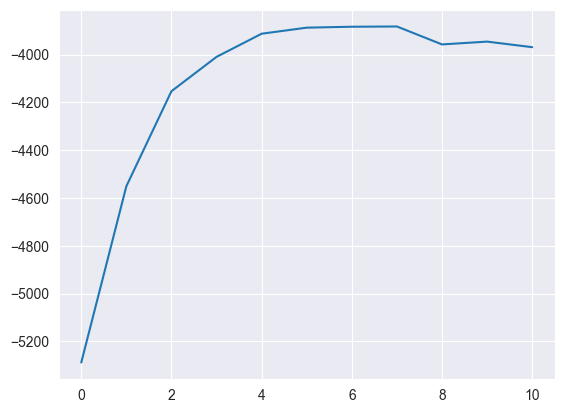

In [12]:
plt.plot(a)

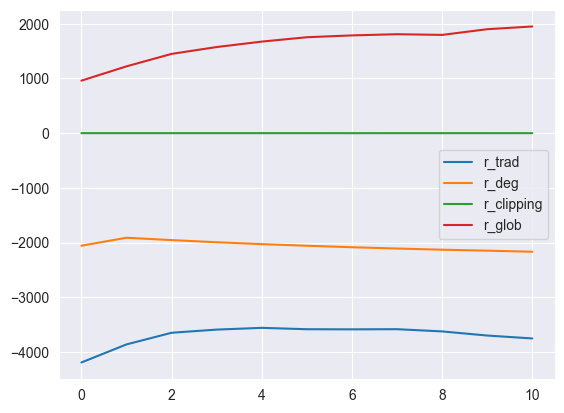

In [13]:
plt.plot(val_info['weig_reward']['r_trad'][..., :lim].sum(axis=(1, 2)), label='r_trad')
plt.plot(val_info['weig_reward']['r_deg'][..., :lim].sum(axis=(1, 2)), label='r_deg')
plt.plot(val_info['weig_reward']['r_clipping'][..., :lim].sum(axis=(1, 2)), label='r_clipping')
plt.plot(val_info['weig_reward']['r_glob'][..., :lim].sum(axis=(1, 2)), label='r_glob')
plt.legend()

In [14]:
cmap = mpl.colormaps['plasma']
n_agents = config['NUM_BATTERY_AGENTS']
colors = cmap(np.linspace(0, 1, n_agents))

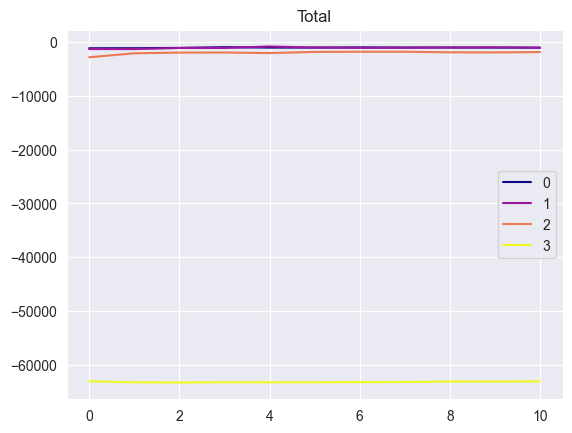

In [15]:
for i in range(n_agents):
    plt.plot(val_info['r_tot'].sum(axis=1)[:, i], color=colors[i], label=f'{i}')
    plt.title('Total')
    plt.legend()

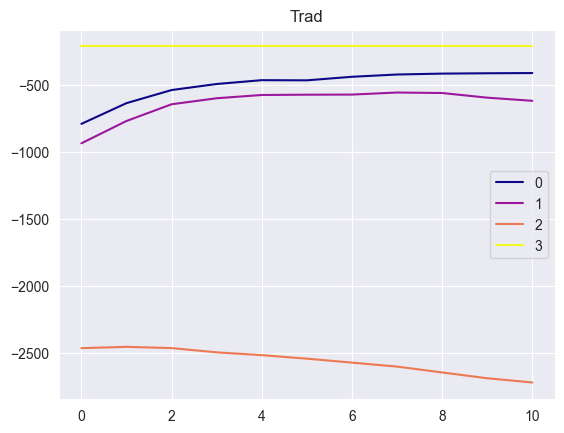

In [16]:
for i in range(n_agents):
    plt.plot(val_info['weig_reward']['r_trad'].sum(axis=1)[:, i], color=colors[i], label=f'{i}')
    plt.title('Trad')
    plt.legend()

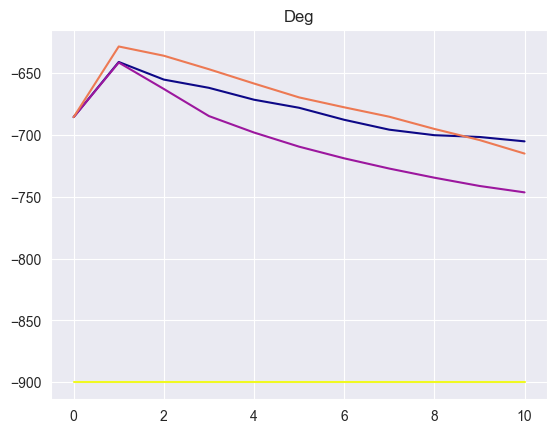

In [17]:
for i in range(n_agents):
    plt.plot(val_info['weig_reward']['r_deg'].sum(axis=1)[:, i], color=colors[i])
    plt.title('Deg')

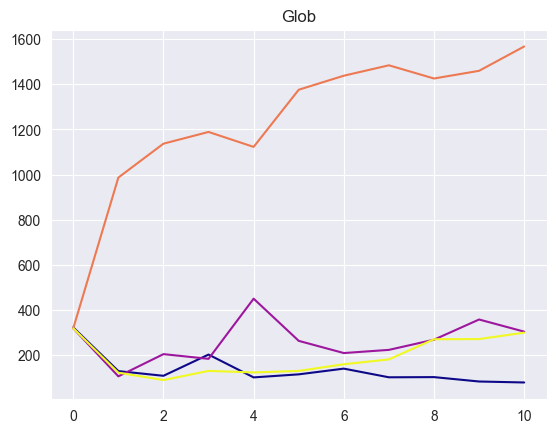

In [18]:
for i in range(n_agents):
    plt.plot(val_info['weig_reward']['r_glob'].sum(axis=1)[:, i], color=colors[i])
    plt.title('Glob')

In [19]:
val_info['self_consumption'].sum(axis=1)

array([12920417., 13564353., 15559127., 17250046., 18200598., 19095878.,
       19743192., 20182664., 20948042., 21996678., 22782486.],
      dtype=float32)

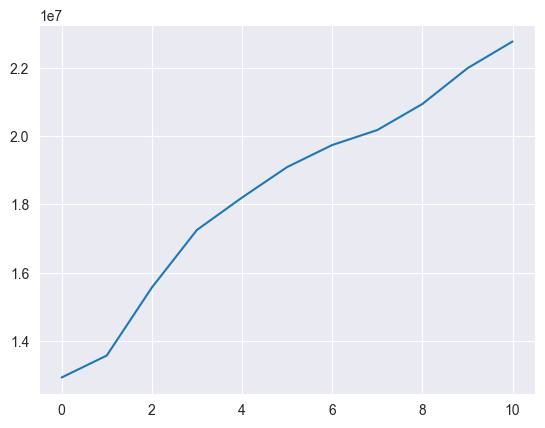

In [20]:
plt.plot(val_info['self_consumption'].sum(axis=1))

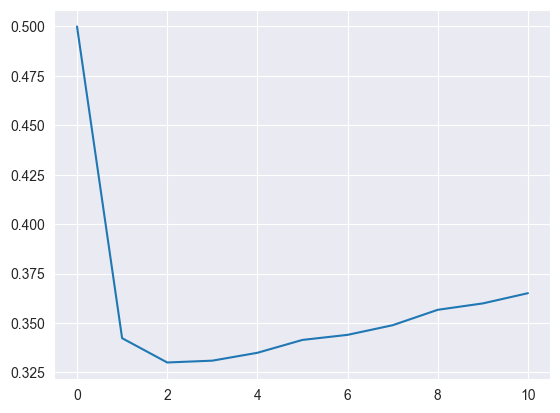

In [21]:
plt.plot(val_info['soc'][..., :lim].mean(axis=(1, 2)))

In [22]:
np.var(val_info['actions_rec'], axis=-1).shape

(11, 43350)

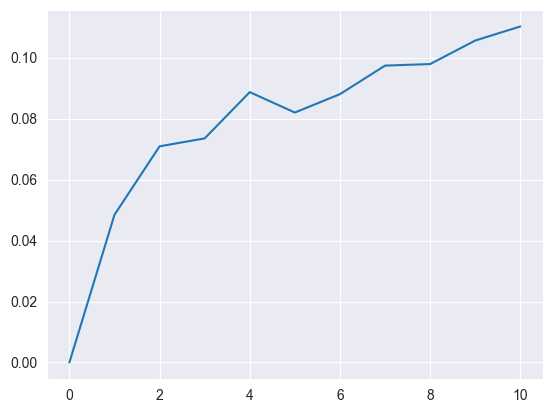

In [23]:
plt.plot(np.var(val_info['actions_rec'], axis=-1).mean(axis=1))

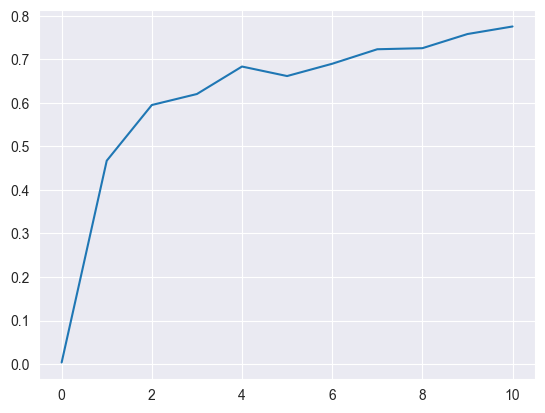

In [24]:
plt.plot(np.mean(np.max(val_info['actions_rec'], axis=-1) - np.min(val_info['actions_rec'], axis=-1), axis=1))